In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [4]:
class NearMiss:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit_resample(self, X, y):
        classes, class_counts = np.unique(y, return_counts=True)
        
        min_class_size = np.min(class_counts)
        
        X_resampled = []
        y_resampled = []
        
        for class_label in classes:
            class_samples = X[y == class_label]
            n_class_samples = class_samples.shape[0]
            
            if n_class_samples > min_class_size:
                nn = NearestNeighbors(n_neighbors=self.n_neighbors)
                nn.fit(class_samples)
                
                distances, _ = nn.kneighbors(class_samples)
                
                sorted_idx = np.argsort(distances.mean(axis=1))
                
                selected_samples = class_samples[sorted_idx[:min_class_size]]
            else:
                selected_samples = class_samples
            
            X_resampled.append(selected_samples)
            y_resampled.append(np.full(min_class_size, class_label))
        
        X_resampled = np.vstack(X_resampled)
        y_resampled = np.hstack(y_resampled)
        return X_resampled, y_resampled

In [5]:
near_miss = NearMiss(n_neighbors=3)
X_train_resampled, y_train_resampled = near_miss.fit_resample(X_train, y_train)

In [6]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({0: 41, 1: 41, 2: 41})


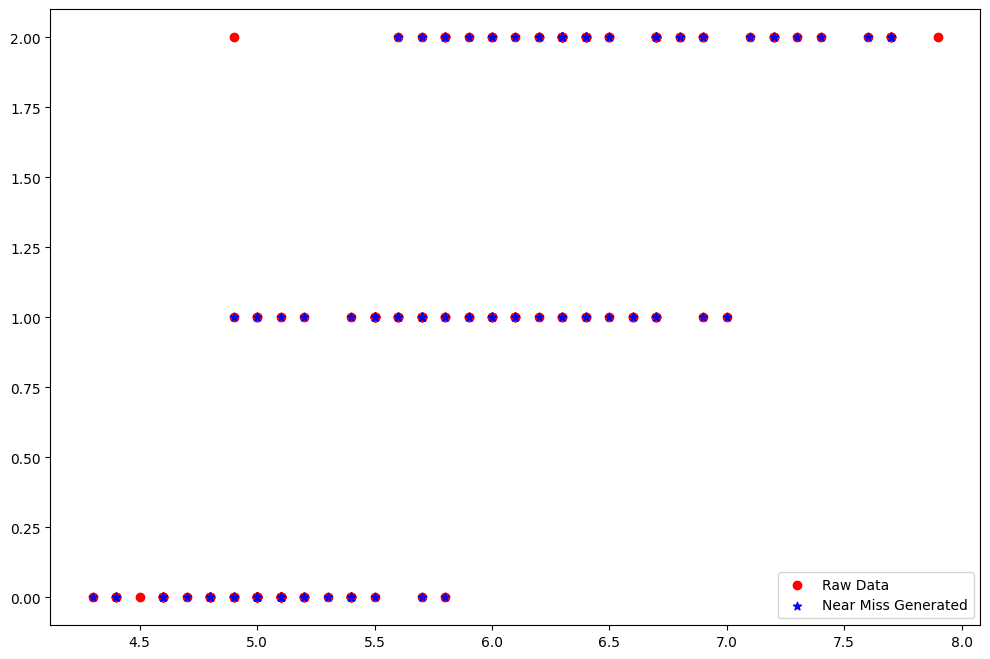

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "Near Miss Generated"])
plt.show()